In [132]:
!python tests/test_core.py

Using downloaded and verified file: /home/pelvisvr/datasets/DeepDRR_DATA/CT-chest.nrrd
Traceback (most recent call last):
  File "tests/test_core.py", line 568, in <module>
    test.test_mesh()
  File "tests/test_core.py", line 205, in test_mesh
    self.project([volume, mesh, mesh2, mesh3], carm, "test_mesh.png", verify=True, num_mesh_layers=32)
  File "tests/test_core.py", line 90, in project
    self.verify_image(name, image_256)
  File "tests/test_core.py", line 125, in verify_image
    assert np.allclose(image_256, truth_img, atol=1)
AssertionError


In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
tex = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
tex = tex.reshape((32, 200, 300, 2))
tex.shape

(32, 200, 300, 2)

mean: 56297.2928 max: 314159 min: 0


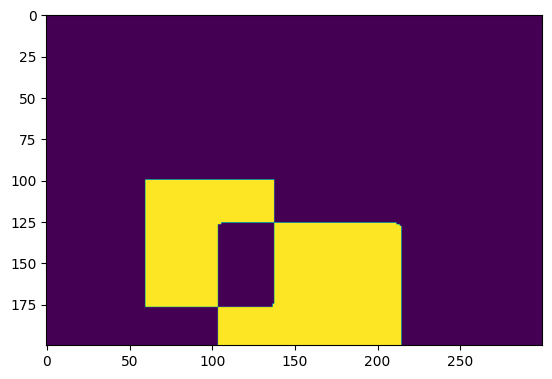

In [135]:
# show tex im
show  = tex[2, :, :, 0]
plt.imshow(show)
print(f"mean: {np.mean(show)} max: {np.max(show)} min: {np.min(show)}")

In [136]:
expected = np.load("../deepdrr-ref/self.mesh_hit_alphas_gpu.npy")
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu.npy")

In [137]:
# shapes
print(expected.shape)
print(actual.shape)

(60000, 32)
(60000, 32)


In [138]:
# dtypes
print(expected.dtype)
print(actual.dtype)

float32
float32


In [139]:
# reshape to 200*300*-1
expected = expected.reshape(200, 300, -1)
actual = actual.reshape(200, 300, -1)

In [140]:
find = np.min(expected)
expected[expected == find] = 0
expected[:, :, 0::2] = -expected[:, :, 0::2]

In [142]:
find = np.max(actual)
actual[actual == find] = 0

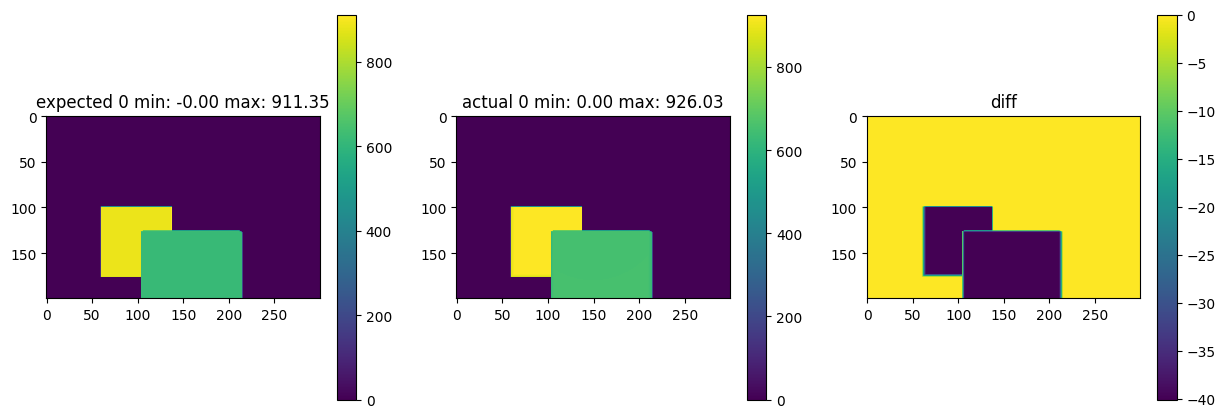

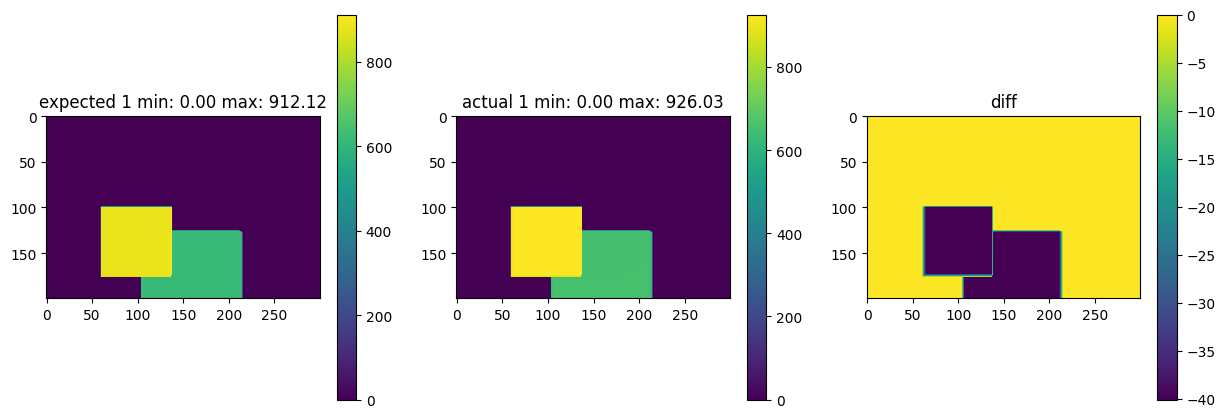

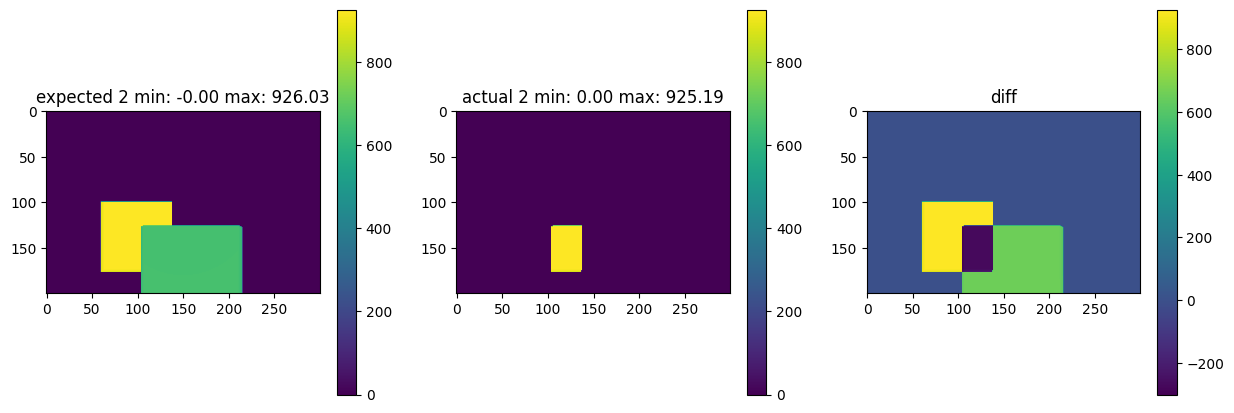

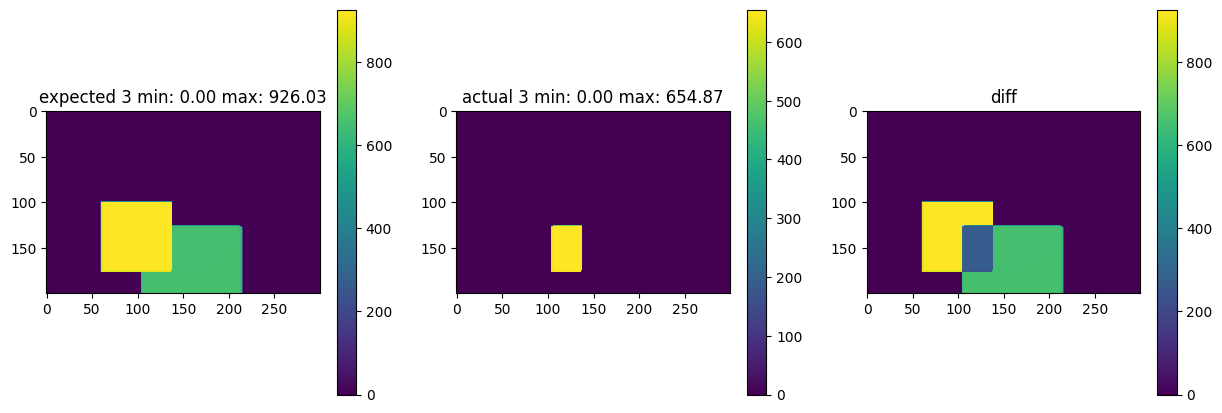

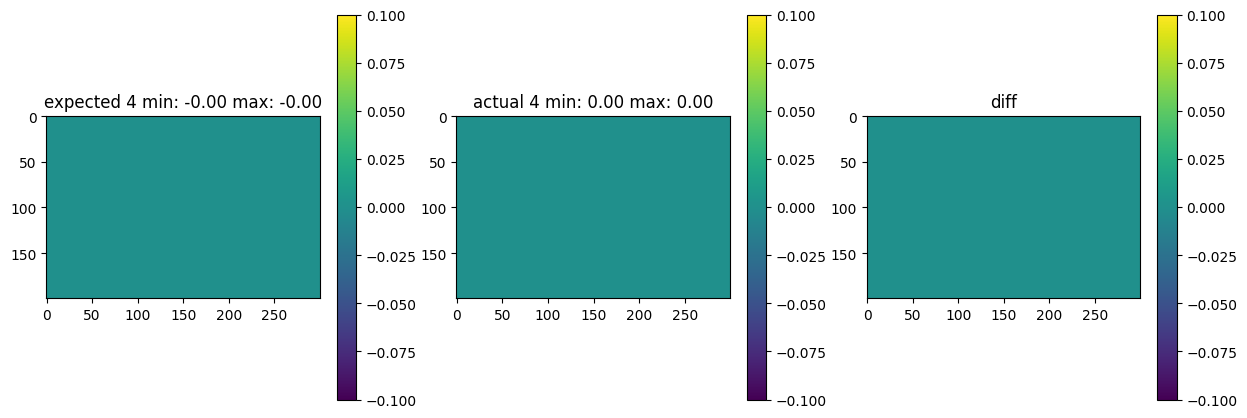

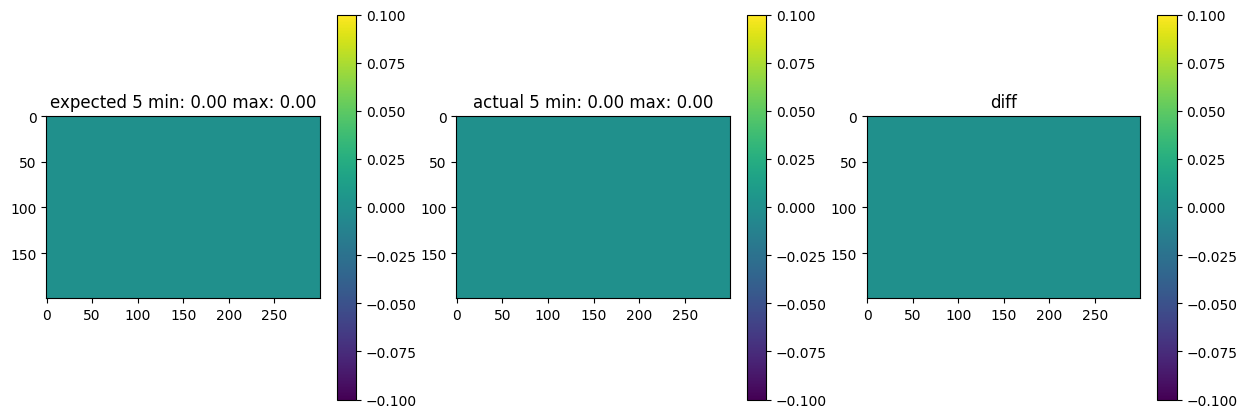

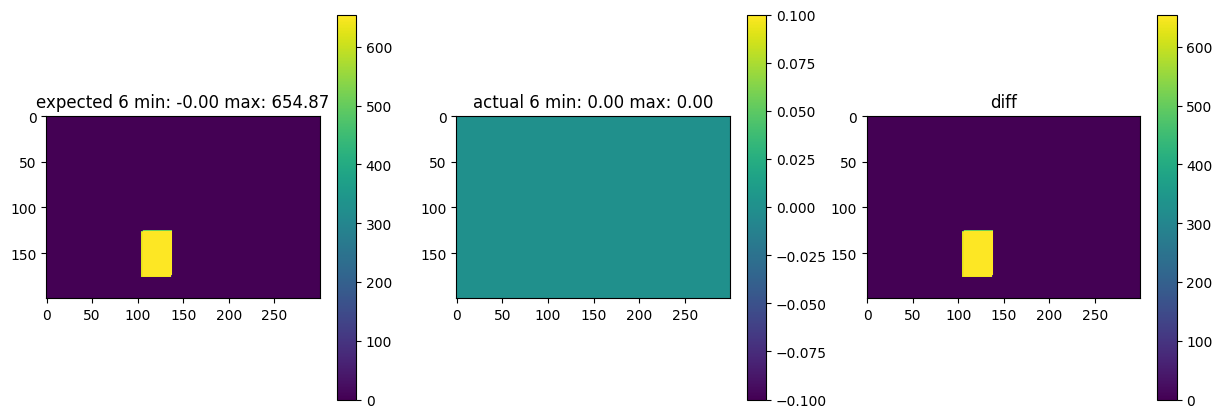

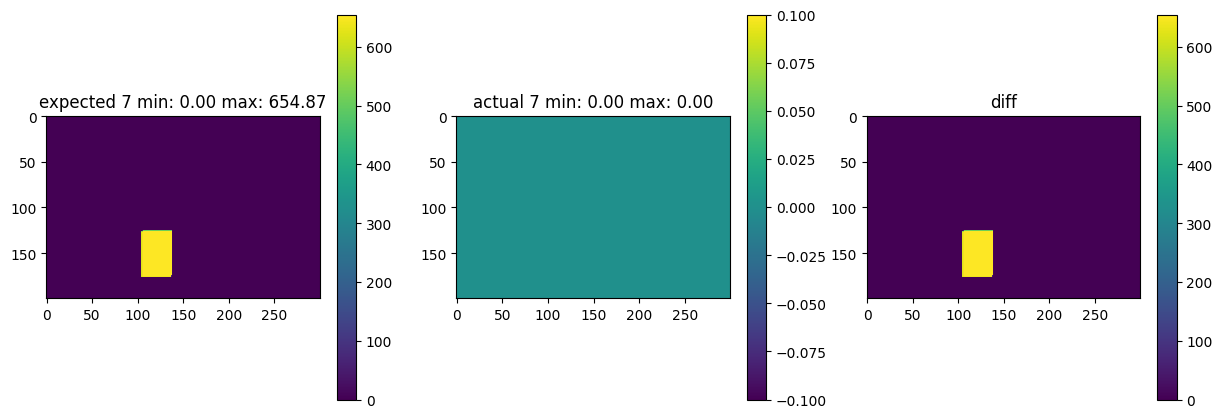

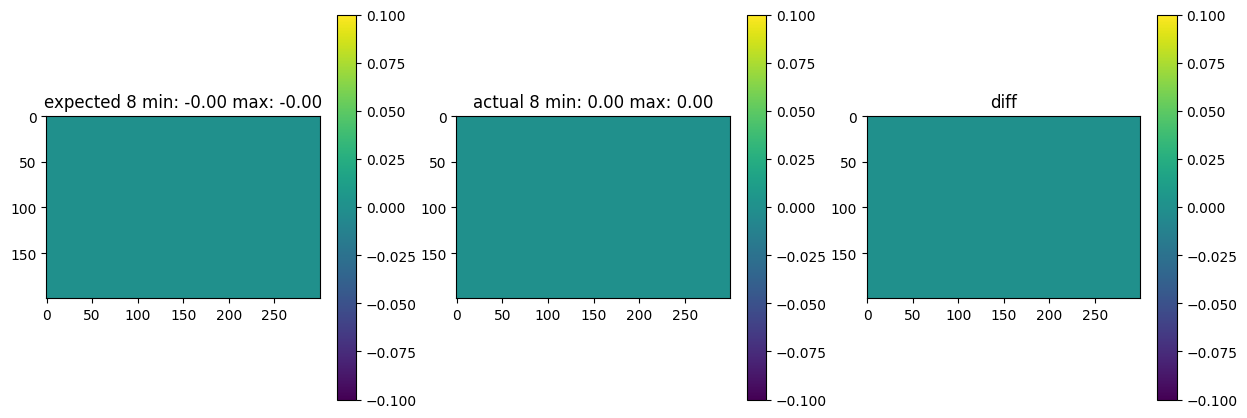

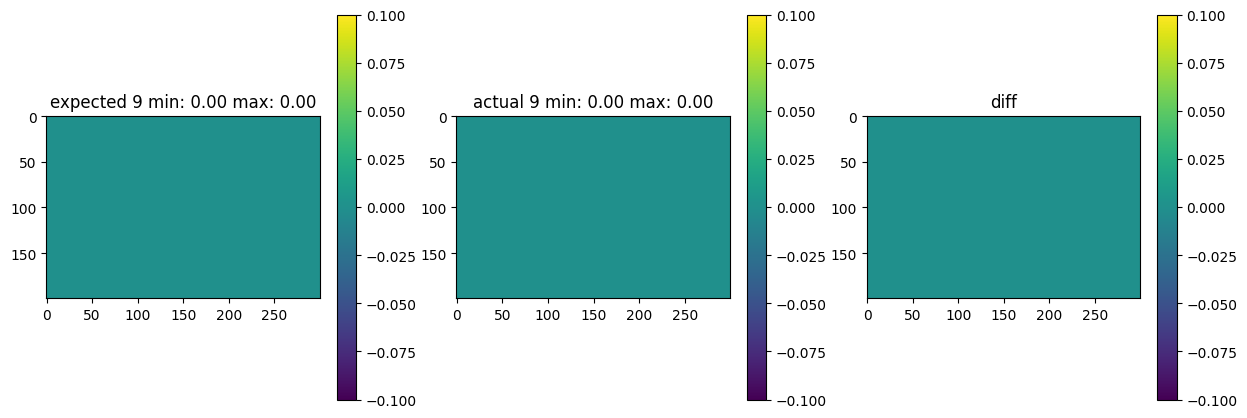

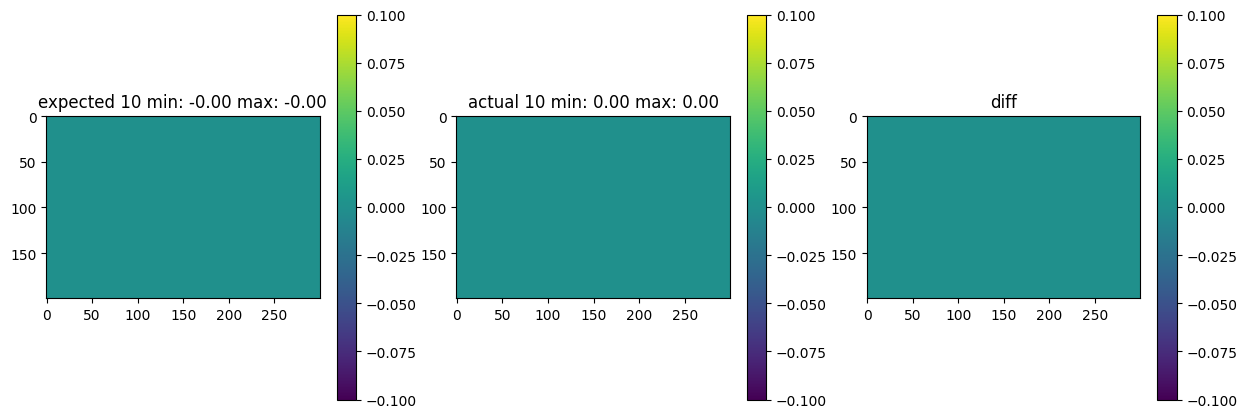

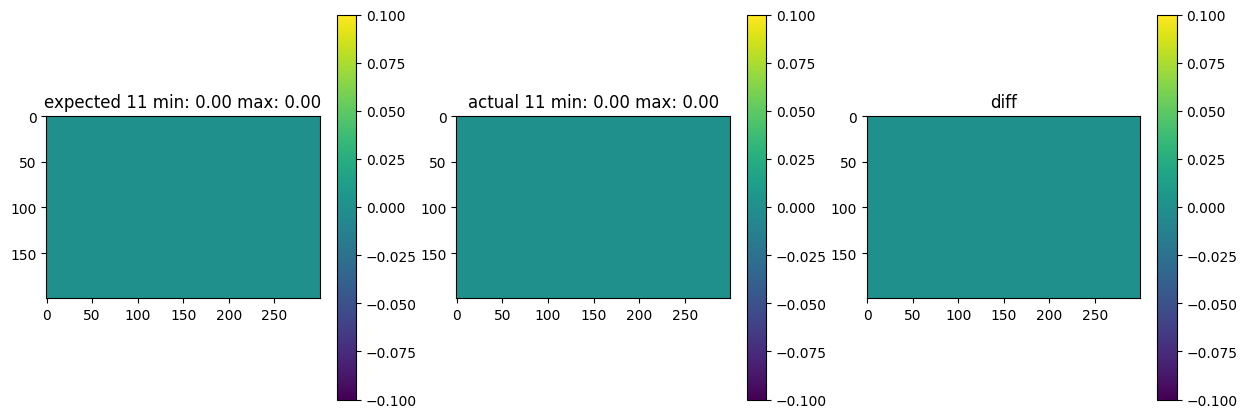

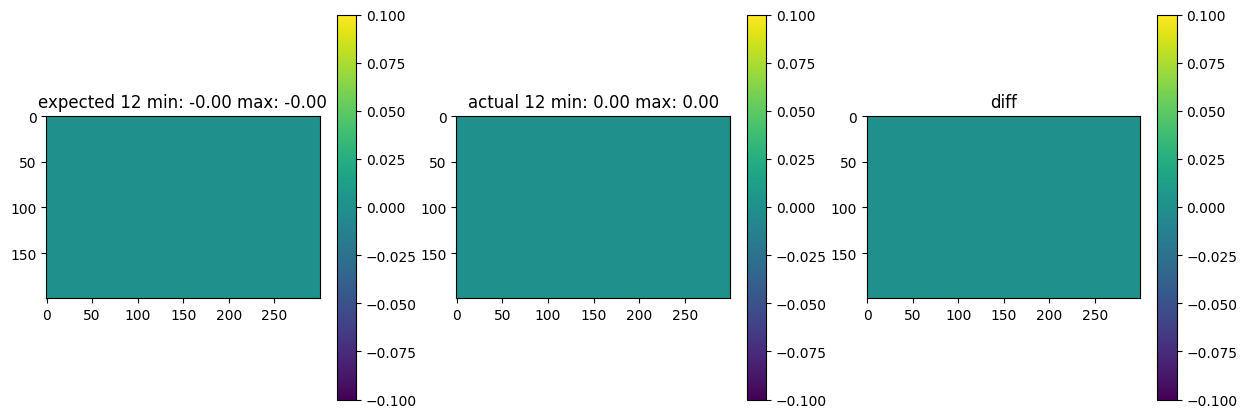

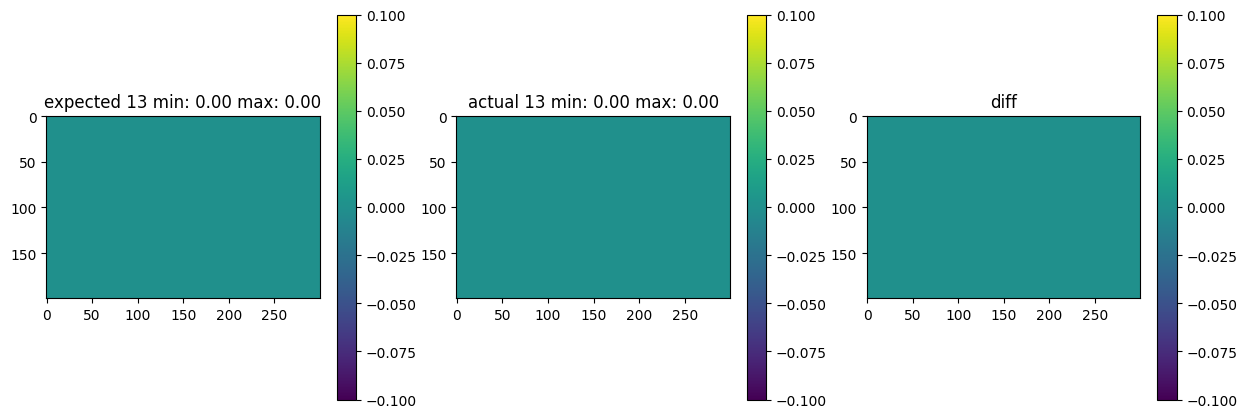

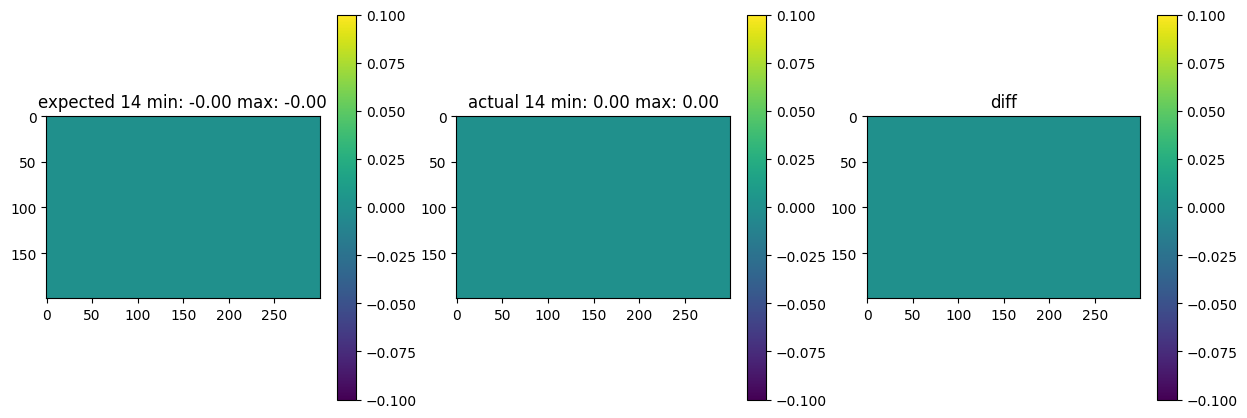

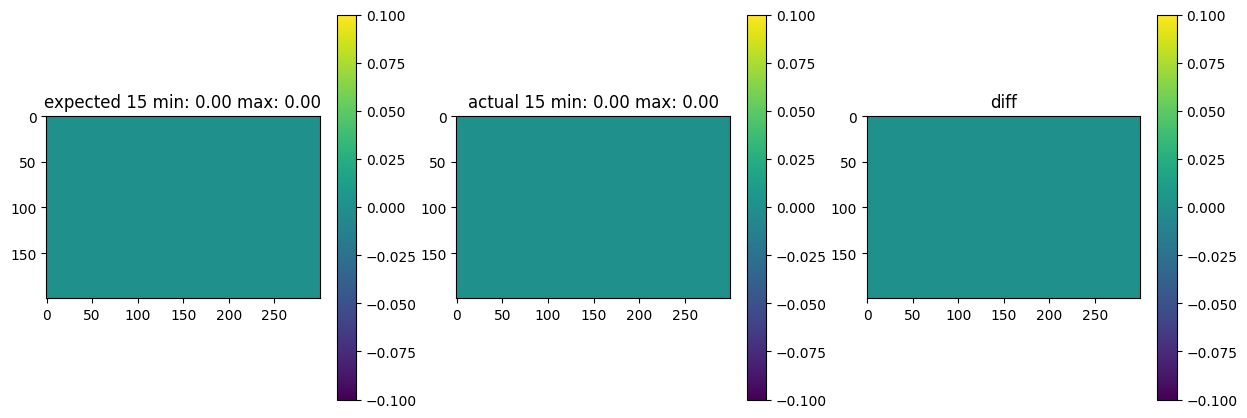

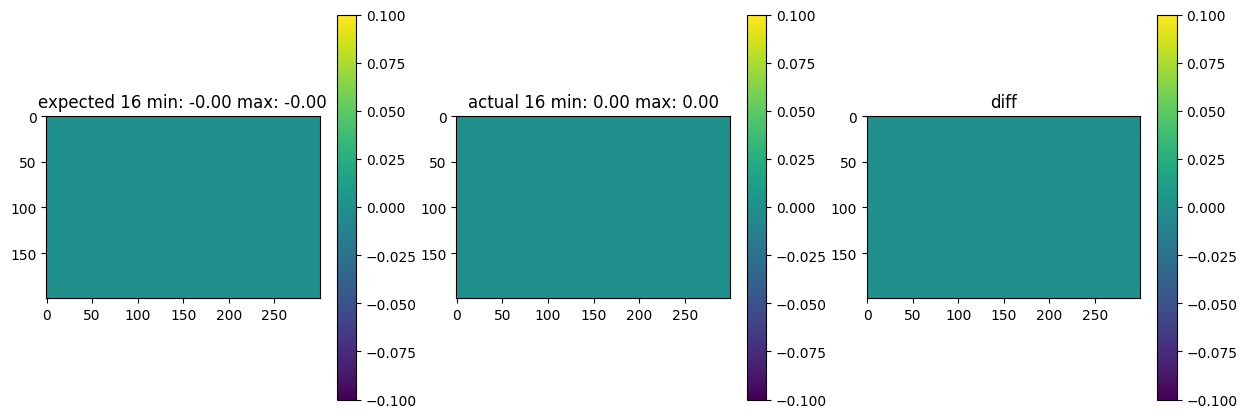

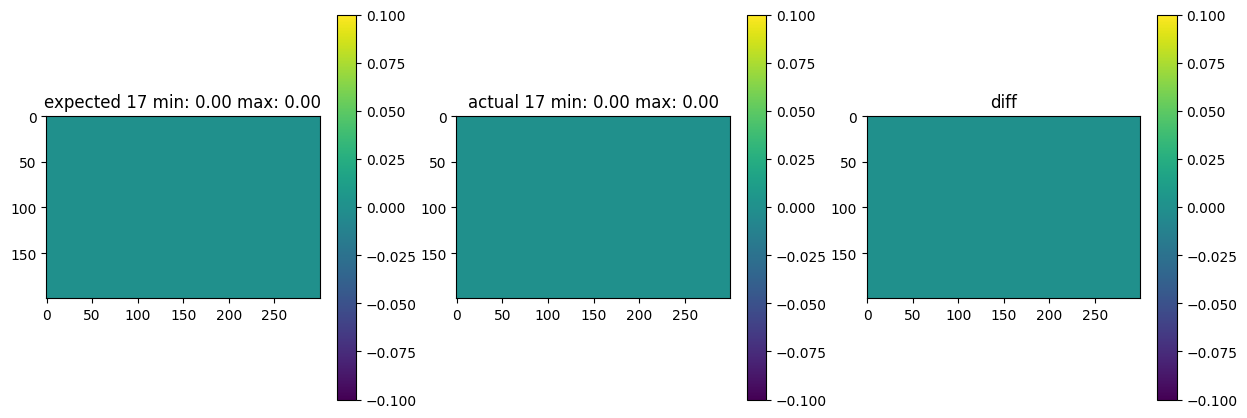

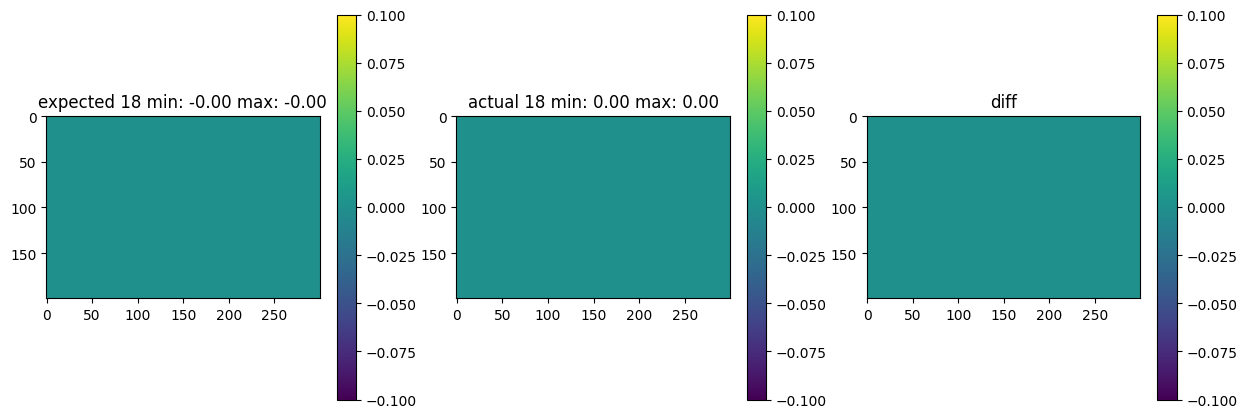

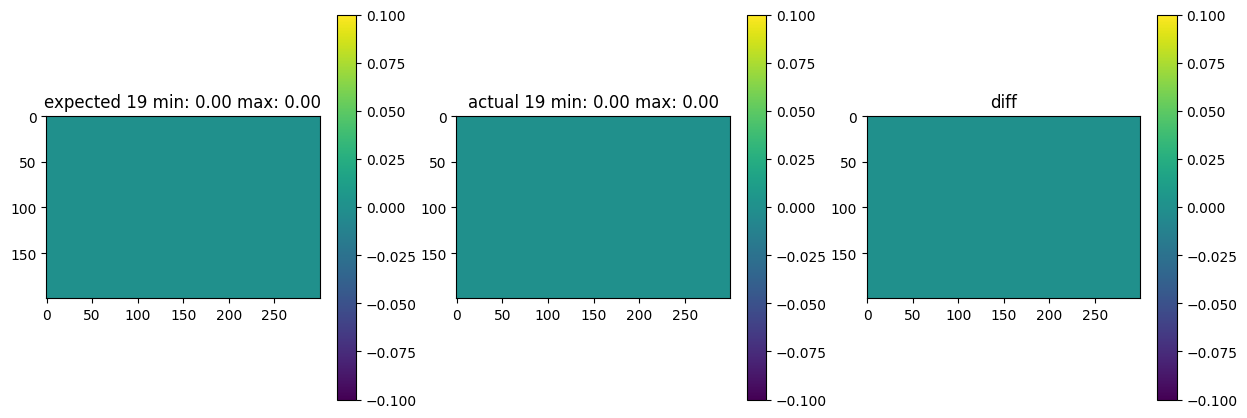

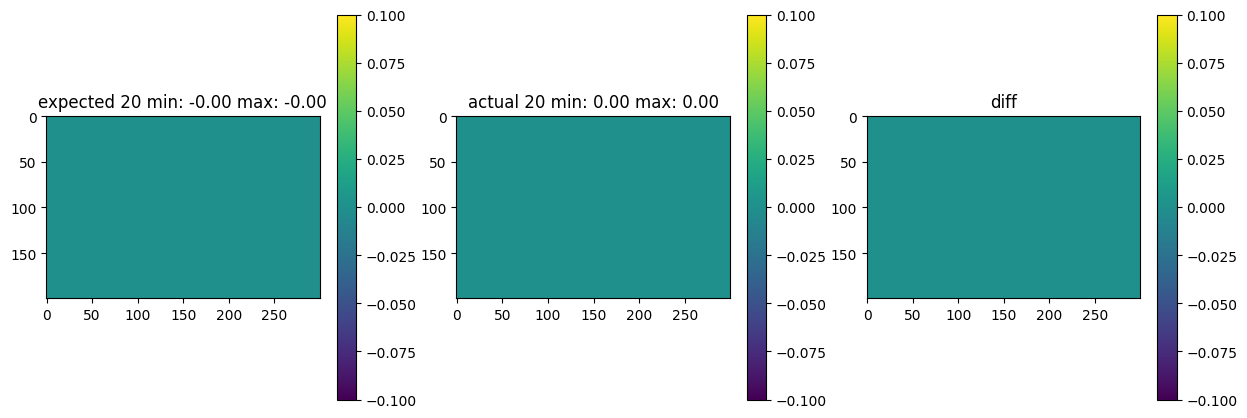

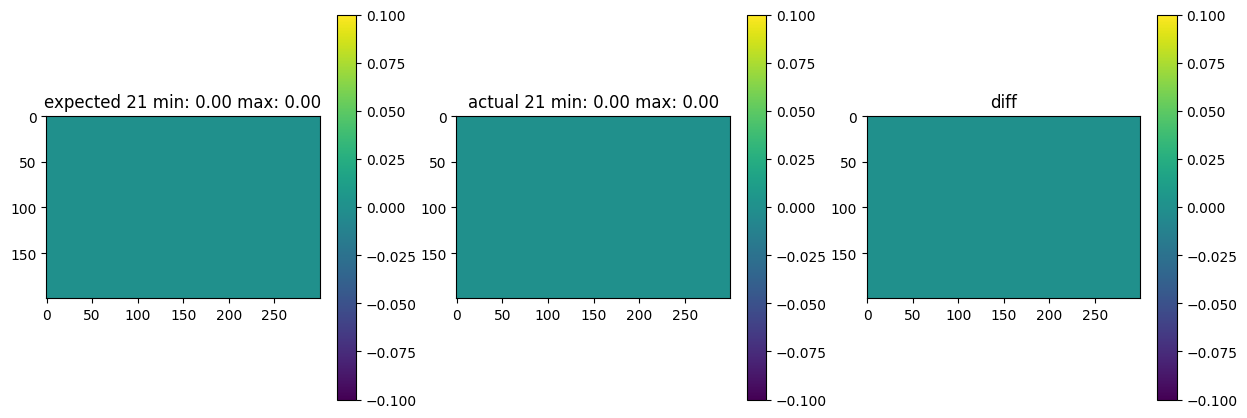

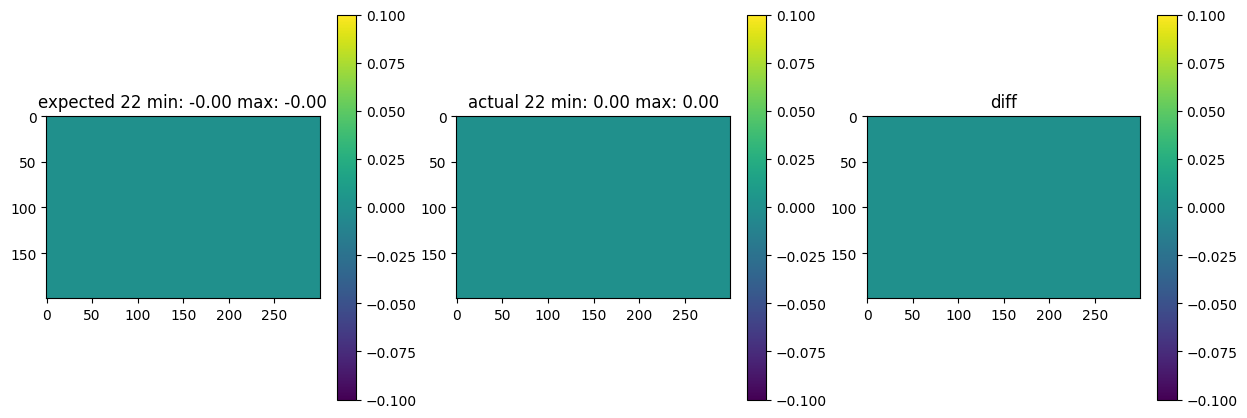

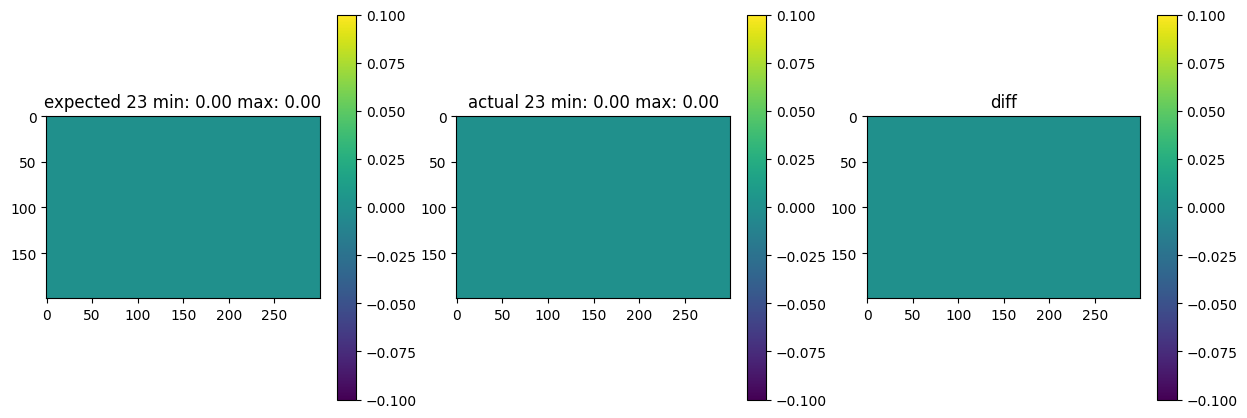

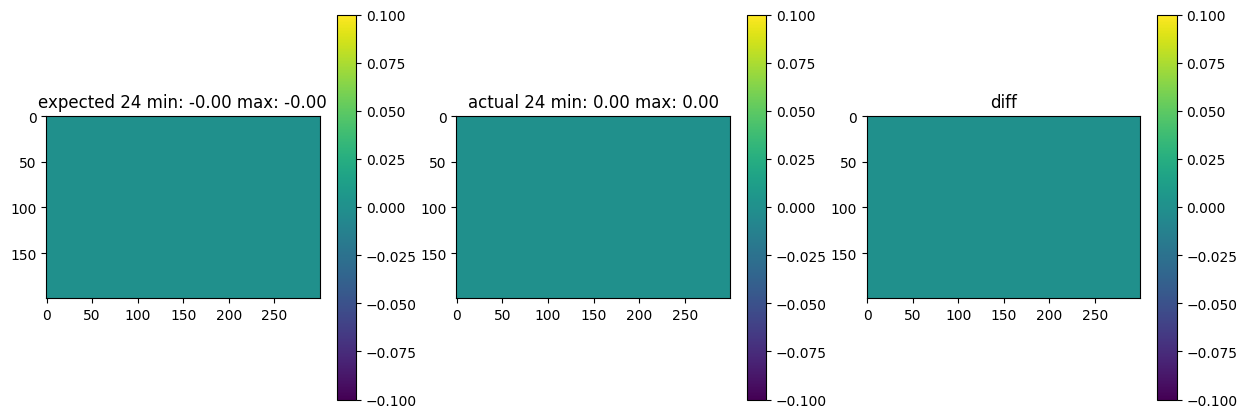

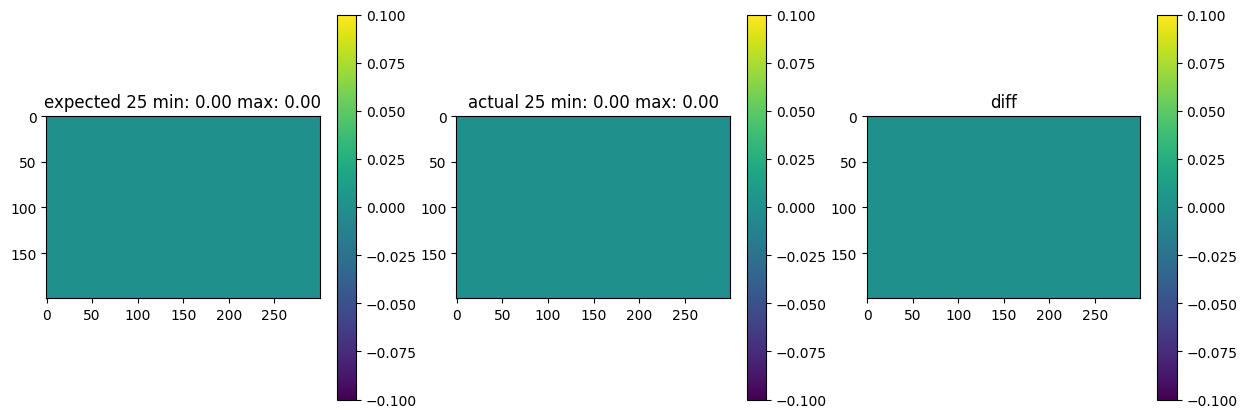

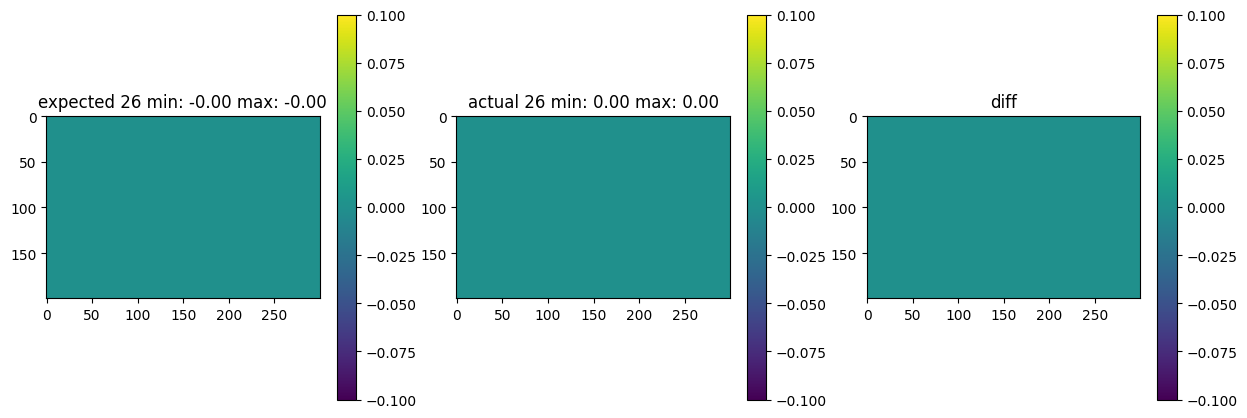

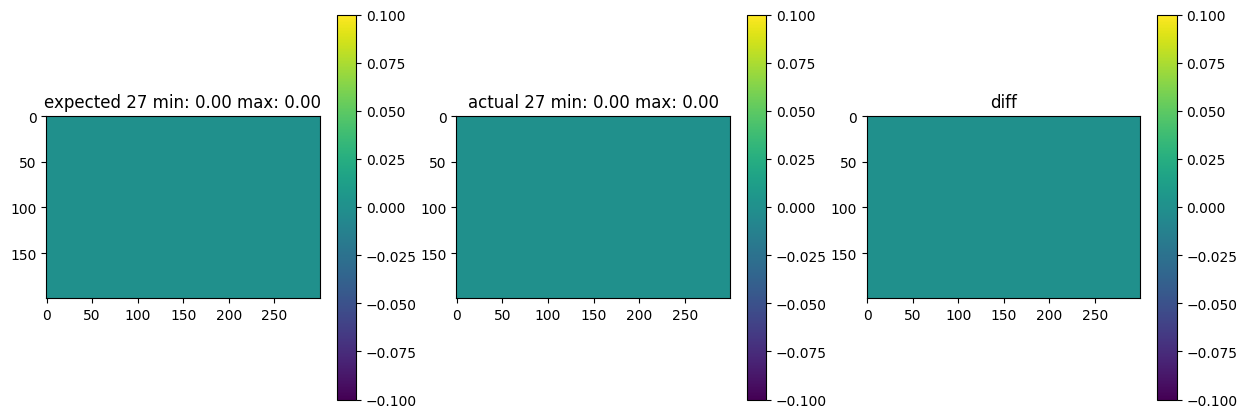

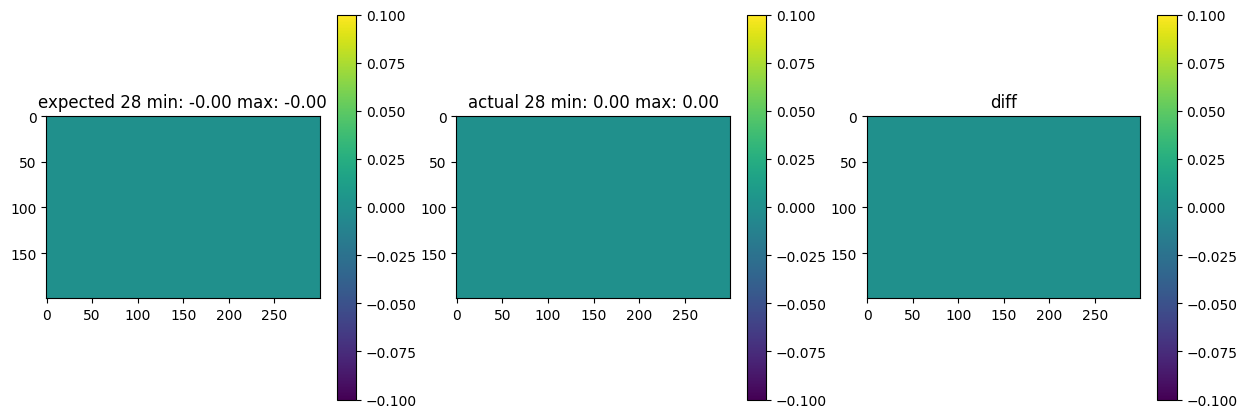

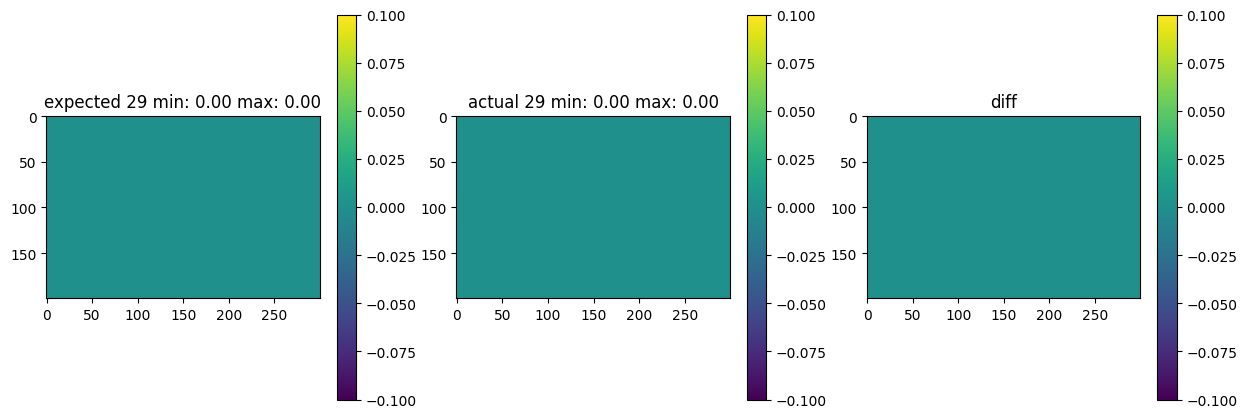

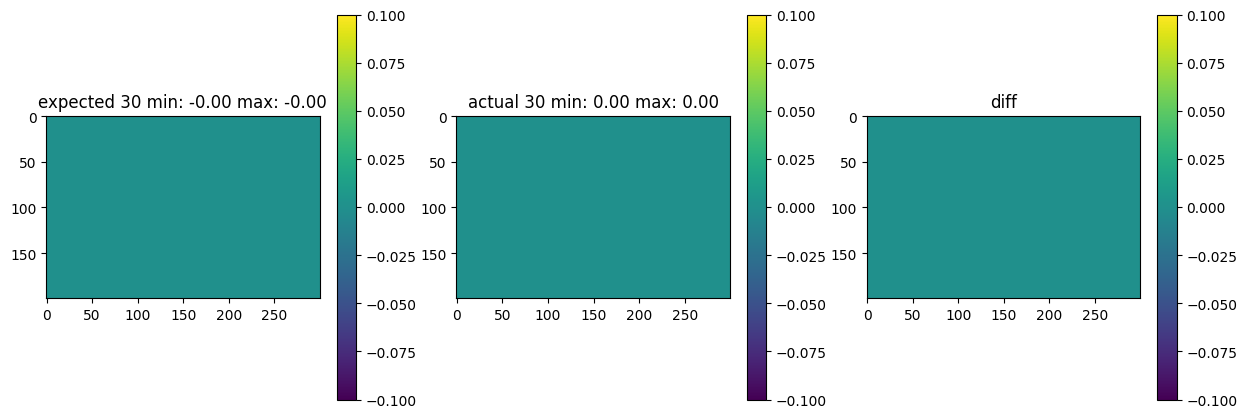

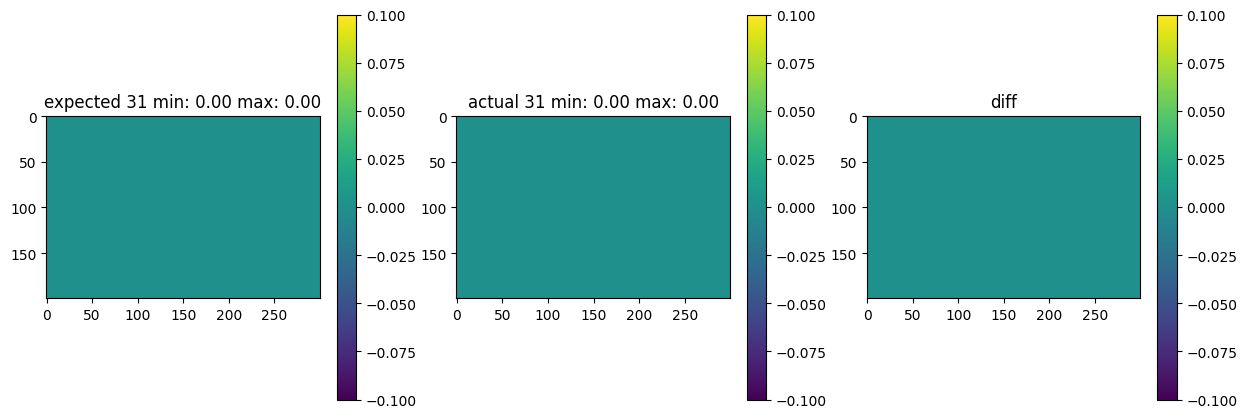

In [144]:
def plot_channel(i):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].set_title(f"expected {i} min: {np.min(expected[:, :, i]):.2f} max: {np.max(expected[:, :, i]):.2f}")
    axs[0].imshow(expected[:, :, i])
    axs[1].set_title(f"actual {i} min: {np.min(actual[:, :, i]):.2f} max: {np.max(actual[:, :, i]):.2f}")
    axs[1].imshow(actual[:, :, i])
    axs[2].set_title("diff")
    axs[2].imshow(expected[:, :, i] - actual[:, :, i])

    # colorbars
    fig.colorbar(axs[0].imshow(expected[:, :, i]), ax=axs[0])
    fig.colorbar(axs[1].imshow(actual[:, :, i]), ax=axs[1])
    fig.colorbar(axs[2].imshow(expected[:, :, i] - actual[:, :, i]), ax=axs[2])
    plt.show()
    

# for i in range(8):
for i in range(expected.shape[2]):
    plot_channel(i)
